In [125]:
# Analyse statistique du S&P500 sur 30 ans
# Importation des bibliothèques nécessaires
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
import warnings
import pandas_datareader as pdr
from datetime import datetime
from IPython.display import display, HTML

In [126]:
# Configuration des graphiques
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12
warnings.filterwarnings('ignore')

In [127]:
# Download S&P 500 data
start_date = '1994-01-01'
end_date = datetime.today().year
sp500_data = pdr.get_data_stooq('^SPX', start=start_date, end=end_date)

In [128]:
# Vérification des colonnes disponibles
print("\nColonnes disponibles:", sp500_data.columns.tolist())

# Identification de la colonne de prix à utiliser
if 'Adj Close' in sp500_data.columns:
    price_column = 'Adj Close'
elif 'Close' in sp500_data.columns:
    price_column = 'Close'
elif 'SP500' in sp500_data.columns:
    price_column = 'SP500'
elif '^SPX' in sp500_data.columns:
    price_column = '^SPX'
else:
    # Utiliser la première colonne si aucune des colonnes attendues n'est trouvée
    price_column = sp500_data.columns[0]

print(f"Colonne de prix utilisée: '{price_column}'")


Colonnes disponibles: ['Open', 'High', 'Low', 'Close', 'Volume']
Colonne de prix utilisée: 'Close'


In [129]:
# Affichage des premières lignes
print("\nAperçu des données téléchargées:")
print(sp500_data.head())


Aperçu des données téléchargées:
               Open     High      Low    Close        Volume
Date                                                        
2024-12-31  5919.74  5929.74  5868.86  5881.63  1.796607e+09
2024-12-30  5920.67  5940.79  5869.16  5906.94  1.943393e+09
2024-12-27  6006.17  6006.17  5932.95  5970.84  1.817798e+09
2024-12-26  6024.97  6049.75  6007.37  6037.59  1.506251e+09
2024-12-24  5984.63  6040.10  5981.44  6040.04  1.133217e+09


In [130]:
# Informations sur les données
print(f"\nPériode couverte: du {sp500_data.index.min().strftime('%d-%m-%Y')} au {sp500_data.index.max().strftime('%d-%m-%Y')}")
print(f"Nombre total de jours de trading: {len(sp500_data)}")



Période couverte: du 03-01-1994 au 31-12-2024
Nombre total de jours de trading: 7804


In [131]:
# Vérification des valeurs manquantes
missing_values = sp500_data.isna().sum()
print("\nValeurs manquantes par colonne:")
print(missing_values)


Valeurs manquantes par colonne:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [132]:
# Si nécessaire, suppression des lignes avec des valeurs manquantes
if sp500_data[price_column].isna().sum() > 0:
    print(f"Suppression des {sp500_data[price_column].isna().sum()} lignes avec des valeurs manquantes...")
    sp500_data = sp500_data.dropna(subset=[price_column])

Aperçu des rendements mensuels:


,Monthly_Return_%,Year,Month,Month_Name
Date,,,,
1994-02-28,-3.004506,1994,2,February
1994-03-31,-4.574646,1994,3,March
1994-04-30,1.153061,1994,4,April
1994-05-31,1.239715,1994,5,May
1994-06-30,-2.679080,1994,6,June



Statistiques des rendements mensuels:


count    371.000000
mean       0.772386
std        4.350999
min      -16.942453
25%       -1.777853
50%        1.229915
75%        3.574831
max       12.684410
Name: Monthly_Return_%, dtype: float64

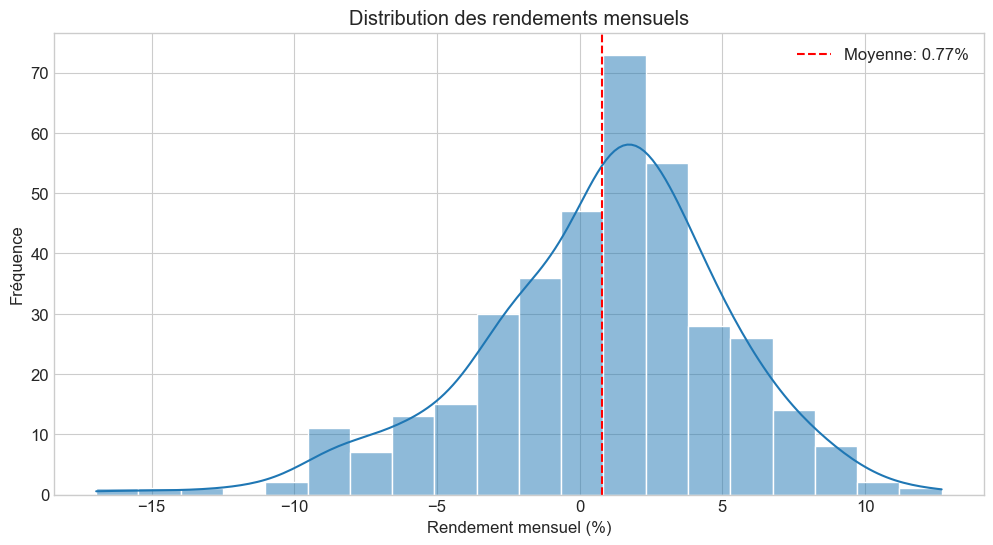

<Figure size 1400x700 with 0 Axes>

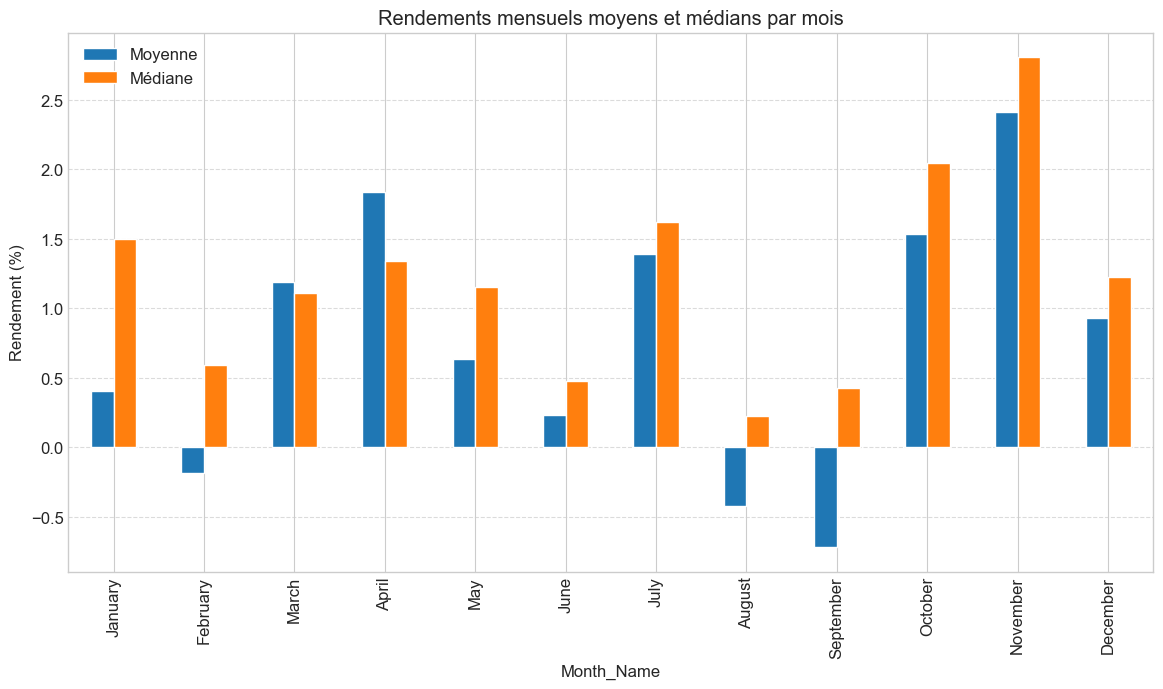

In [133]:
# 2. Calcul des rendements mensuels
monthly_prices = sp500_data[price_column].resample('M').last()

# Calcul des rendements mensuels en pourcentage
monthly_returns = monthly_prices.pct_change() * 100
monthly_returns = monthly_returns.dropna()

# Création d'un DataFrame avec des colonnes supplémentaires
monthly_df = pd.DataFrame(monthly_returns)
monthly_df.columns = ['Monthly_Return_%']
monthly_df['Year'] = monthly_df.index.year
monthly_df['Month'] = monthly_df.index.month
monthly_df['Month_Name'] = monthly_df.index.strftime('%B')  # Nom du mois

# Affichage des rendements mensuels dans Jupyter
# Jupyter affiche automatiquement le résultat de la dernière ligne d'une cellule
# Aperçu des rendements mensuels
print("Aperçu des rendements mensuels:")
display(monthly_df.head())

# Statistiques des rendements mensuels
print("\nStatistiques des rendements mensuels:")
display(monthly_df['Monthly_Return_%'].describe())

# Visualisation des rendements mensuels (histogramme)
plt.figure(figsize=(12, 6))
sns.histplot(monthly_df['Monthly_Return_%'], kde=True)
plt.title('Distribution des rendements mensuels')
plt.xlabel('Rendement mensuel (%)')
plt.ylabel('Fréquence')
plt.axvline(monthly_df['Monthly_Return_%'].mean(), color='r', linestyle='--', label=f'Moyenne: {monthly_df["Monthly_Return_%"].mean():.2f}%')
plt.legend()
plt.show()

# Boxplot des rendements par mois
plt.figure(figsize=(14, 7))
monthly_pivot = monthly_df.pivot_table(index='Month_Name', values='Monthly_Return_%', aggfunc=['mean', 'median'])
# Réorganiser les mois dans l'ordre chronologique
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_pivot = monthly_pivot.reindex(month_order)
monthly_pivot.columns = ['Moyenne', 'Médiane']
monthly_pivot.plot(kind='bar', figsize=(14, 7))
plt.title('Rendements mensuels moyens et médians par mois')
plt.ylabel('Rendement (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [134]:
# 3. Calcul des rendements annuels
# Resample pour obtenir le dernier prix ajusté de chaque année
annual_prices = sp500_data[price_column].resample('Y').last()

# Calcul des rendements annuels en pourcentage
annual_returns = annual_prices.pct_change() * 100
annual_returns = annual_returns.dropna()

# Création d'un DataFrame avec l'année
annual_df = pd.DataFrame(annual_returns)
annual_df.columns = ['Annual_Return_%']
annual_df['Year'] = annual_df.index.year

# Aperçu des rendements annuels
print("\nRendements annuels du S&P500 sur 30 ans:")
print(annual_df)

# Statistiques des rendements annuels
print("\nStatistiques des rendements annuels:")
print(annual_df['Annual_Return_%'].describe())


Rendements annuels du S&P500 sur 30 ans:
            Annual_Return_%  Year
Date                             
1995-12-31        34.110654  1995
1996-12-31        20.263666  1996
1997-12-31        31.008181  1997
1998-12-31        26.668590  1998
1999-12-31        19.526045  1999
2000-12-31       -10.139187  2000
2001-12-31       -13.042688  2001
2002-12-31       -23.365968  2002
2003-12-31        26.380396  2003
2004-12-31         8.993453  2004
2005-12-31         3.001023  2005
2006-12-31        13.619431  2006
2007-12-31         3.529578  2007
2008-12-31       -38.485794  2008
2009-12-31        23.454193  2009
2010-12-31        12.782710  2010
2011-12-31        -0.003181  2011
2012-12-31        13.405693  2012
2013-12-31        29.601245  2013
2014-12-31        11.390638  2014
2015-12-31        -0.726602  2015
2016-12-31         9.535016  2016
2017-12-31        19.419965  2017
2018-12-31        -6.237260  2018
2019-12-31        28.878074  2019
2020-12-31        16.258922  2020
2021-1

Top 10 des meilleurs rendements mensuels:


,Monthly_Return_%,Year,Month,Month_Name
Date,,,,
2020-04-30 00:00:00,12.68%,2020,4,April
2011-10-31 00:00:00,10.77%,2011,10,October
2020-11-30 00:00:00,10.75%,2020,11,November
2000-03-31 00:00:00,9.67%,2000,3,March
2009-04-30 00:00:00,9.39%,2009,4,April
2022-07-31 00:00:00,9.11%,2022,7,July
2023-11-30 00:00:00,8.92%,2023,11,November
2010-09-30 00:00:00,8.76%,2010,9,September
2002-10-31 00:00:00,8.64%,2002,10,October



Top 10 des pires rendements mensuels:


,Monthly_Return_%,Year,Month,Month_Name
Date,,,,
2022-04-30 00:00:00,-8.80%,2022,4,April
2008-09-30 00:00:00,-9.08%,2008,9,September
2018-12-31 00:00:00,-9.18%,2018,12,December
2001-02-28 00:00:00,-9.23%,2001,2,February
2022-09-30 00:00:00,-9.34%,2022,9,September
2009-02-28 00:00:00,-10.99%,2009,2,February
2002-09-30 00:00:00,-11.00%,2002,9,September
2020-03-31 00:00:00,-12.51%,2020,3,March
1998-08-31 00:00:00,-14.58%,1998,8,August



Top 10 des meilleurs rendements annuels:


,Annual_Return_%,Year
Date,,
1995-12-31 00:00:00,34.11%,1995
1997-12-31 00:00:00,31.01%,1997
2013-12-31 00:00:00,29.60%,2013
2019-12-31 00:00:00,28.88%,2019
2021-12-31 00:00:00,26.89%,2021
1998-12-31 00:00:00,26.67%,1998
2003-12-31 00:00:00,26.38%,2003
2023-12-31 00:00:00,24.23%,2023
2009-12-31 00:00:00,23.45%,2009



Top 10 des pires rendements annuels:


,Annual_Return_%,Year
Date,,
2007-12-31 00:00:00,3.53%,2007
2005-12-31 00:00:00,3.00%,2005
2011-12-31 00:00:00,-0.00%,2011
2015-12-31 00:00:00,-0.73%,2015
2018-12-31 00:00:00,-6.24%,2018
2000-12-31 00:00:00,-10.14%,2000
2001-12-31 00:00:00,-13.04%,2001
2022-12-31 00:00:00,-19.44%,2022
2002-12-31 00:00:00,-23.37%,2002


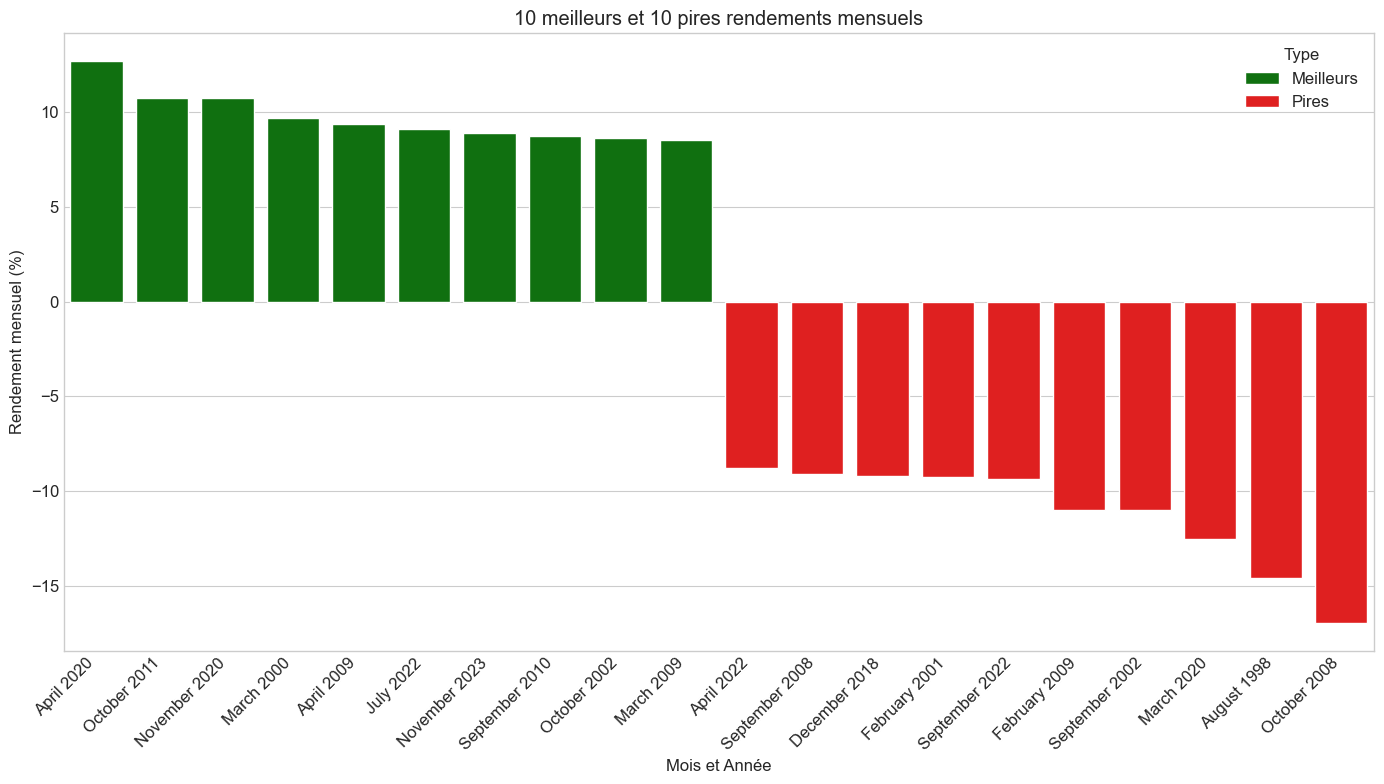

<Figure size 1200x600 with 0 Axes>

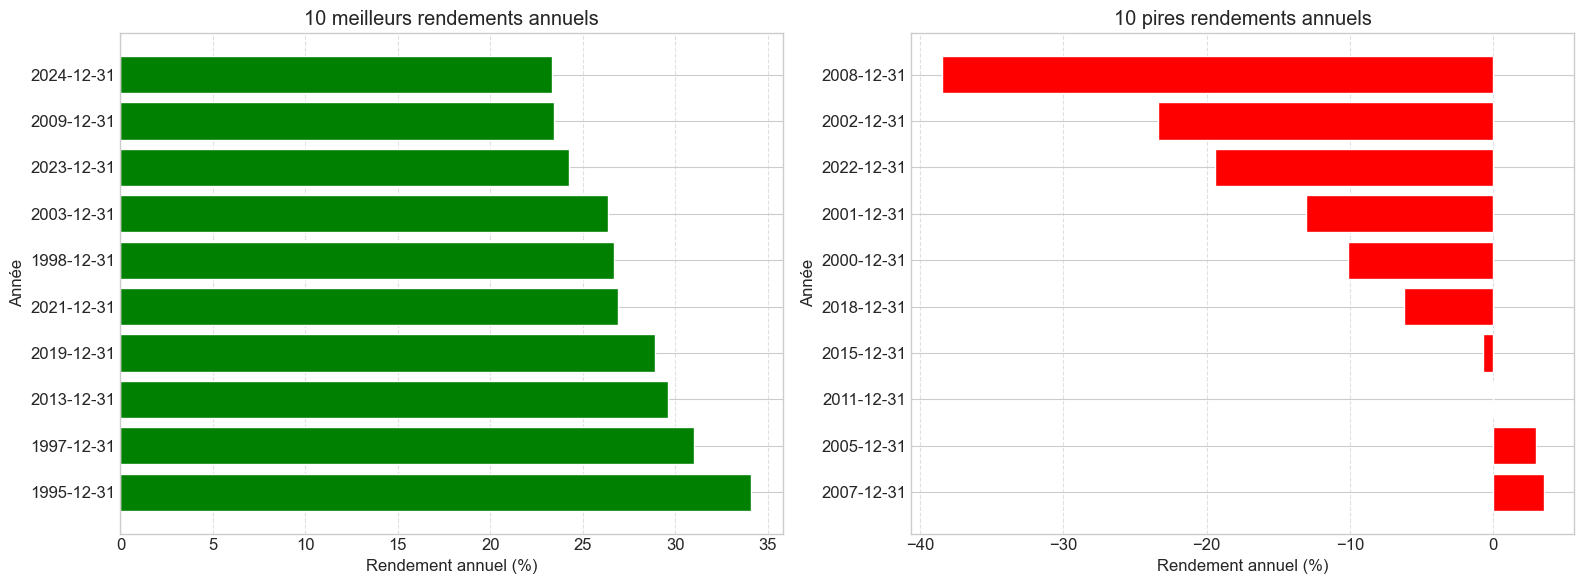

In [135]:
# 4. Tri des rendements mensuels et annuels
# Tri des rendements mensuels du plus élevé au plus bas
sorted_monthly_returns = monthly_df.sort_values(by='Monthly_Return_%', ascending=False)

# Tri des rendements annuels du plus élevé au plus bas
sorted_annual_returns = annual_df.sort_values(by='Annual_Return_%', ascending=False)

# Affichage des 10 meilleurs et 10 pires rendements mensuels
print("Top 10 des meilleurs rendements mensuels:")
display(sorted_monthly_returns.head(10).style.format({'Monthly_Return_%': '{:.2f}%'}))

print("\nTop 10 des pires rendements mensuels:")
display(sorted_monthly_returns.tail(10).style.format({'Monthly_Return_%': '{:.2f}%'}))

# Affichage des meilleurs et pires rendements annuels
print("\nTop 10 des meilleurs rendements annuels:")
display(sorted_annual_returns.head(10).style.format({'Annual_Return_%': '{:.2f}%'}))

print("\nTop 10 des pires rendements annuels:")
display(sorted_annual_returns.tail(10).style.format({'Annual_Return_%': '{:.2f}%'}))

# Visualisation des meilleurs et pires rendements mensuels
plt.figure(figsize=(14, 8))

# Données pour le graphique
top_months = sorted_monthly_returns.head(10).copy()
top_months['Type'] = 'Meilleurs'
bottom_months = sorted_monthly_returns.tail(10).copy()
bottom_months['Type'] = 'Pires'

# Fusion des deux DataFrames
plot_data = pd.concat([top_months, bottom_months])

# Création d'une colonne pour les étiquettes d'axe
plot_data['Label'] = plot_data['Month_Name'] + ' ' + plot_data.index.year.astype(str)

# Création du graphique
sns.barplot(x='Label', y='Monthly_Return_%', hue='Type', data=plot_data, palette=['green', 'red'])
plt.xticks(rotation=45, ha='right')
plt.title('10 meilleurs et 10 pires rendements mensuels')
plt.xlabel('Mois et Année')
plt.ylabel('Rendement mensuel (%)')
plt.tight_layout()
plt.show()

# Visualisation des meilleurs et pires rendements annuels
plt.figure(figsize=(12, 6))

# Données pour le graphique
top_years = sorted_annual_returns.head(10).copy()
bottom_years = sorted_annual_returns.tail(10).copy()

# Création du graphique
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Meilleurs rendements
ax1.barh(top_years.index.astype(str), top_years['Annual_Return_%'], color='green')
ax1.set_title('10 meilleurs rendements annuels')
ax1.set_xlabel('Rendement annuel (%)')
ax1.set_ylabel('Année')
ax1.grid(axis='x', linestyle='--', alpha=0.6)

# Pires rendements
ax2.barh(bottom_years.index.astype(str), bottom_years['Annual_Return_%'], color='red')
ax2.set_title('10 pires rendements annuels')
ax2.set_xlabel('Rendement annuel (%)')
ax2.set_ylabel('Année')
ax2.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Analyse des années positives vs négatives:


,Métrique,Valeur,Pourcentage
0,Années totales analysées,30,100%
1,Années positives,22,73.3%
2,Années négatives,8,26.7%


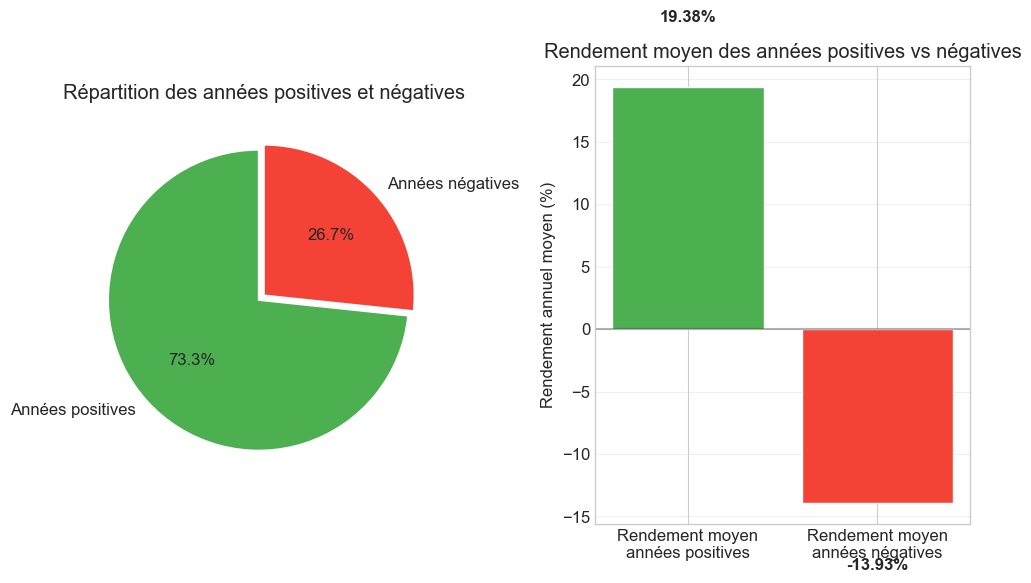

In [136]:
# 5. Analyse des années positives vs négatives

# Identification des années positives et négatives
positive_years = annual_df[annual_df['Annual_Return_%'] > 0]
negative_years = annual_df[annual_df['Annual_Return_%'] <= 0]

# Calcul des statistiques
total_years = len(annual_df)
num_positive_years = len(positive_years)
num_negative_years = len(negative_years)
pct_positive_years = (num_positive_years / total_years) * 100
pct_negative_years = (num_negative_years / total_years) * 100

# Affichage plus clair des statistiques
print("Analyse des années positives vs négatives:")
display(pd.DataFrame({
    'Métrique': ['Années totales analysées', 'Années positives', 'Années négatives'],
    'Valeur': [total_years, num_positive_years, num_negative_years],
    'Pourcentage': ['100%', f"{pct_positive_years:.1f}%", f"{pct_negative_years:.1f}%"]
}))

# Visualisation avec un graphique circulaire
plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#F44336']  # Vert pour positif, rouge pour négatif

# Premier graphique: répartition des années
plt.subplot(1, 2, 1)
plt.pie([num_positive_years, num_negative_years],
        labels=['Années positives', 'Années négatives'],
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        explode=(0.05, 0))
plt.title('Répartition des années positives et négatives')

# Second graphique: comparaison des rendements moyens
plt.subplot(1, 2, 2)
avg_returns = [positive_years['Annual_Return_%'].mean(), negative_years['Annual_Return_%'].mean()]
plt.bar(['Rendement moyen\nannées positives', 'Rendement moyen\nannées négatives'],
        avg_returns,
        color=colors)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Ajout des valeurs sur les barres
for i, v in enumerate(avg_returns):
    plt.text(i, v + (5 if v > 0 else -5), f"{v:.2f}%",
             ha='center', va='center' if v < 0 else 'bottom',
             fontweight='bold')

plt.title('Rendement moyen des années positives vs négatives')
plt.ylabel('Rendement annuel moyen (%)')

plt.tight_layout()
plt.show()

Analyse des mois négatifs dans les années positives:


,Annual_Return_%,Negative_Months,Worst_Return_%,Worst_Month
Year,,,,
1995,34.11%,2,-0.50%,October
1997,31.01%,3,-5.75%,August
2013,29.60%,2,-3.13%,August
2019,28.88%,2,-6.58%,May
2021,26.89%,3,-4.76%,September
1998,26.67%,3,-14.58%,August
2003,26.38%,3,-2.74%,January
2023,24.23%,4,-4.87%,September
2009,23.45%,3,-10.99%,February


En moyenne, une année positive comporte 3.4 mois négatifs
Le pire rendement mensuel moyen dans une année positive est de -5.23%


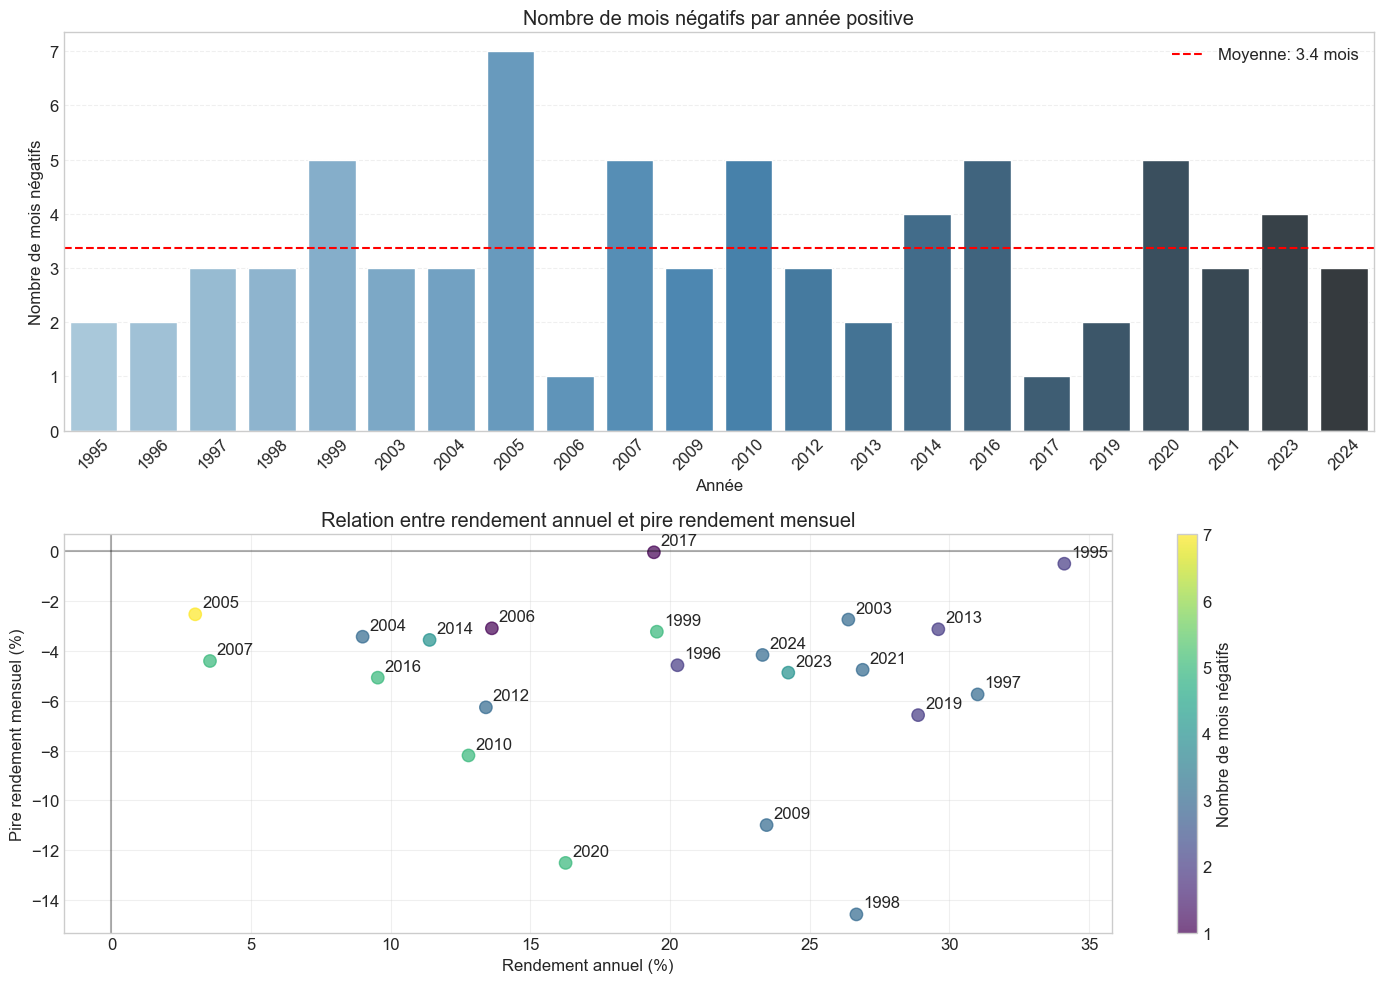


Matrice de corrélation:


,Annual_Return_%,Negative_Months,Worst_Return_%
Annual_Return_%,1.000000,-0.581044,-0.068490
Negative_Months,-0.581044,1.000000,-0.199794
Worst_Return_%,-0.068490,-0.199794,1.000000


In [137]:
# 6. Analyse des mois négatifs dans les années positives

# Initialisation du DataFrame pour stocker les résultats
positive_years_analysis = []

# Analyse pour chaque année positive
for _, row in positive_years.iterrows():
    year = row.name if isinstance(row.name, int) else row['Year']

    # Filtrage des rendements mensuels pour cette année
    year_months = monthly_df[monthly_df['Year'] == year]

    # Vérification qu'il y a des données pour cette année
    if len(year_months) > 0:
        # Comptage des mois négatifs
        negative_months = year_months[year_months['Monthly_Return_%'] < 0]
        num_negative_months = len(negative_months)

        # Recherche du pire rendement mensuel
        worst_monthly_return = year_months['Monthly_Return_%'].min()
        worst_month_idx = year_months['Monthly_Return_%'].idxmin()
        worst_month_name = year_months.loc[worst_month_idx, 'Month_Name']

        # Récupération du rendement annuel
        annual_return = row['Annual_Return_%']

        # Ajout aux résultats
        positive_years_analysis.append({
            'Year': year,
            'Annual_Return_%': annual_return,
            'Negative_Months': num_negative_months,
            'Worst_Return_%': worst_monthly_return,
            'Worst_Month': worst_month_name
        })

# Création d'un DataFrame à partir des résultats
positive_years_df = pd.DataFrame(positive_years_analysis)

# S'assurer que le DataFrame n'est pas vide
if not positive_years_df.empty:
    # Convertir la colonne Year en type entier pour éviter les décimales
    positive_years_df['Year'] = positive_years_df['Year'].astype(int)

    # Tri par rendement annuel (du plus élevé au plus bas)
    positive_years_df = positive_years_df.sort_values(by='Annual_Return_%', ascending=False)

    # Affichage des résultats sans l'index
    print("Analyse des mois négatifs dans les années positives:")
    display(positive_years_df.set_index('Year').style.format({
        'Annual_Return_%': '{:.2f}%',
        'Worst_Return_%': '{:.2f}%'
    }))

    # Calcul et affichage des statistiques
    avg_negative_months = positive_years_df['Negative_Months'].mean()
    avg_worst_return = positive_years_df['Worst_Return_%'].mean()

    print(f"En moyenne, une année positive comporte {avg_negative_months:.1f} mois négatifs")
    print(f"Le pire rendement mensuel moyen dans une année positive est de {avg_worst_return:.2f}%")

    # Visualisations
    plt.figure(figsize=(14, 10))

    # Graphique 1: Nombre de mois négatifs par année positive
    plt.subplot(2, 1, 1)
    sns.barplot(x='Year', y='Negative_Months', data=positive_years_df, palette='Blues_d')
    plt.axhline(y=avg_negative_months, color='red', linestyle='--',
               label=f'Moyenne: {avg_negative_months:.1f} mois')
    plt.title('Nombre de mois négatifs par année positive')
    plt.xlabel('Année')
    plt.ylabel('Nombre de mois négatifs')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Graphique 2: Rendement annuel vs pire rendement mensuel
    plt.subplot(2, 1, 2)
    plt.scatter(positive_years_df['Annual_Return_%'], positive_years_df['Worst_Return_%'],
               alpha=0.7, s=80, c=positive_years_df['Negative_Months'], cmap='viridis')

    # Ajouter une étiquette pour chaque point (année)
    for _, row in positive_years_df.iterrows():
        plt.annotate(str(int(row['Year'])),
                    (row['Annual_Return_%'], row['Worst_Return_%']),
                    xytext=(5, 5), textcoords='offset points')

    plt.colorbar(label='Nombre de mois négatifs')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Relation entre rendement annuel et pire rendement mensuel')
    plt.xlabel('Rendement annuel (%)')
    plt.ylabel('Pire rendement mensuel (%)')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Tableau de corrélation
    correlation_data = positive_years_df[['Annual_Return_%', 'Negative_Months', 'Worst_Return_%']]
    correlation_matrix = correlation_data.corr()

    print("\nMatrice de corrélation:")
    display(correlation_matrix.style.background_gradient(cmap='coolwarm'))
else:
    print("Aucune année positive avec des données mensuelles complètes n'a été trouvée.")


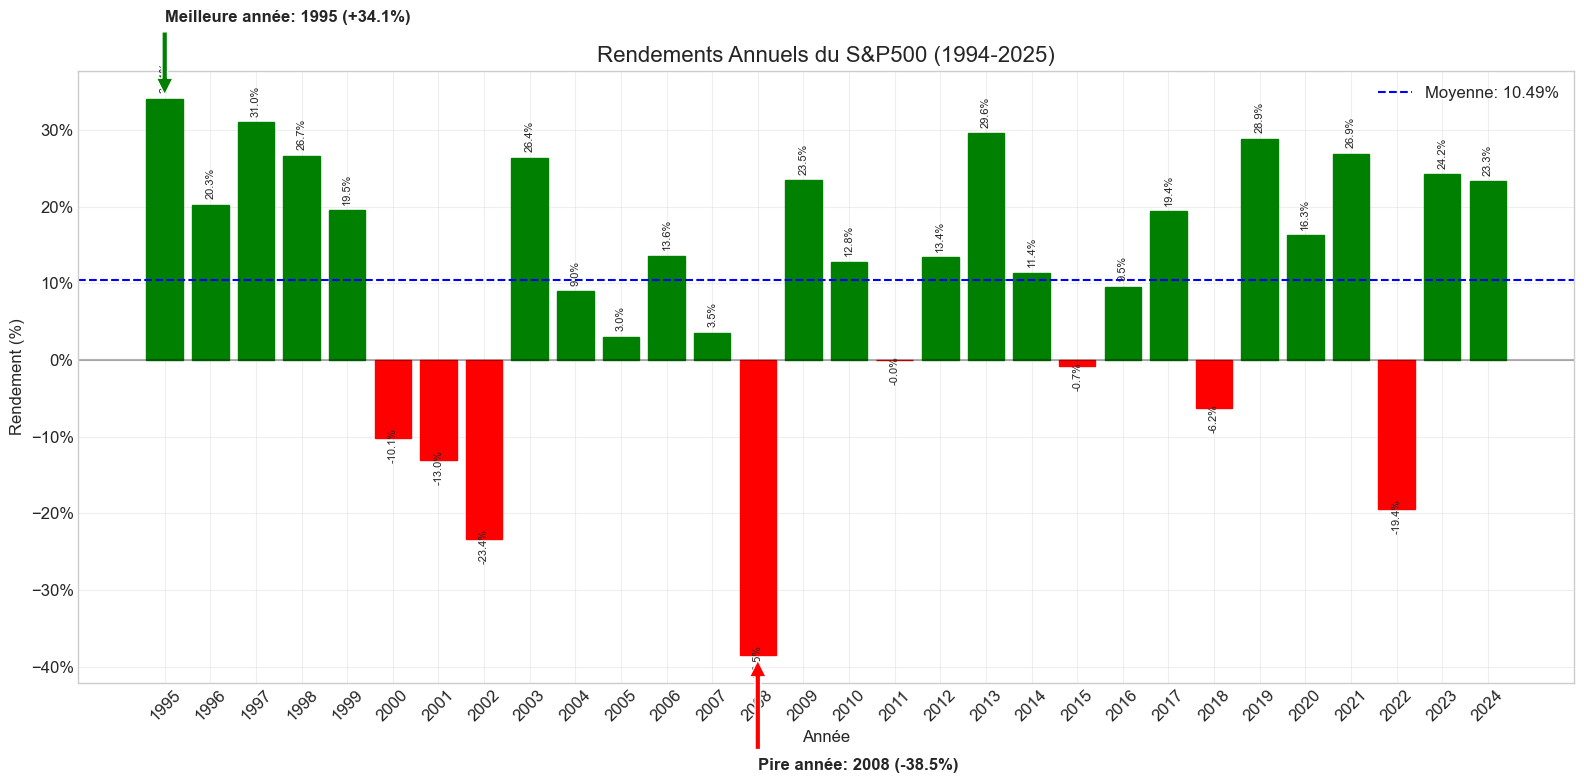

,Période,Rendement annuel moyen,Rendement annuel médian,Meilleure année,Pire année,Années positives,Années négatives
0,1994-2025,10.49%,13.51%,1995 (+34.11%),2008 (-38.49%),22 (73.3%),8 (26.7%)


In [152]:
# 7. Visualisation des rendements annuels depuis 1994
plt.figure(figsize=(16, 8))

# Filtrer les données à partir de 1994
# Convertir la date de début en datetime pour la comparaison
start_date = pd.to_datetime('1994-01-01')
filtered_annual_df = annual_df[annual_df.index >= start_date]

# Extraction des années pour l'affichage
years = filtered_annual_df.index.year

# Création des barres pour les rendements annuels
bars = plt.bar(years, filtered_annual_df['Annual_Return_%'])

# Coloration des barres (vert pour positif, rouge pour négatif)
for i, bar in enumerate(bars):
    if filtered_annual_df['Annual_Return_%'].iloc[i] > 0:
        bar.set_color('green')
    else:
        bar.set_color('red')

# Ajout d'une ligne horizontale à 0%
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# Calcul du rendement annuel moyen
avg_annual_return = filtered_annual_df['Annual_Return_%'].mean()
plt.axhline(y=avg_annual_return, color='blue', linestyle='--',
           label=f'Moyenne: {avg_annual_return:.2f}%')

# Ajout des labels et du titre
plt.title(f'Rendements Annuels du S&P500 (1994-{datetime.today().year})', fontsize=16)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Rendement (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()

# Ajustement des ticks sur l'axe x
plt.xticks(years, rotation=45)

# Formatage de l'axe y en pourcentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Ajout des valeurs au-dessus des barres
for i, v in enumerate(filtered_annual_df['Annual_Return_%']):
    plt.text(years[i], v + (1 if v >= 0 else -3), f"{v:.1f}%",
             ha='center', fontsize=8, rotation=90)

# Annotation des années extrêmes
best_idx = filtered_annual_df['Annual_Return_%'].idxmax()
worst_idx = filtered_annual_df['Annual_Return_%'].idxmin()
best_return = filtered_annual_df.loc[best_idx, 'Annual_Return_%']
worst_return = filtered_annual_df.loc[worst_idx, 'Annual_Return_%']
best_year = filtered_annual_df.index[filtered_annual_df.index == best_idx][0].year
worst_year = filtered_annual_df.index[filtered_annual_df.index == worst_idx][0].year

plt.annotate(f'Meilleure année: {best_year} (+{best_return:.1f}%)',
            xy=(best_year, best_return),
            xytext=(best_year, best_return + 10),
            arrowprops=dict(facecolor='green', shrink=0.05),
            fontweight='bold')

plt.annotate(f'Pire année: {worst_year} ({worst_return:.1f}%)',
            xy=(worst_year, worst_return),
            xytext=(worst_year, worst_return - 15),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontweight='bold')

plt.tight_layout()
plt.show()

# Tableau récapitulatif des statistiques
stats_summary = {
    'Période': [f'1994-{datetime.today().year}'],
    'Rendement annuel moyen': [f'{avg_annual_return:.2f}%'],
    'Rendement annuel médian': [f'{filtered_annual_df["Annual_Return_%"].median():.2f}%'],
    'Meilleure année': [f'{best_year} (+{best_return:.2f}%)'],
    'Pire année': [f'{worst_year} ({worst_return:.2f}%)'],
    'Années positives': [f'{(filtered_annual_df["Annual_Return_%"] > 0).sum()} ({(filtered_annual_df["Annual_Return_%"] > 0).mean()*100:.1f}%)'],
    'Années négatives': [f'{(filtered_annual_df["Annual_Return_%"] < 0).sum()} ({(filtered_annual_df["Annual_Return_%"] < 0).mean()*100:.1f}%)'],
}

stats_df = pd.DataFrame(stats_summary)
display(stats_df)


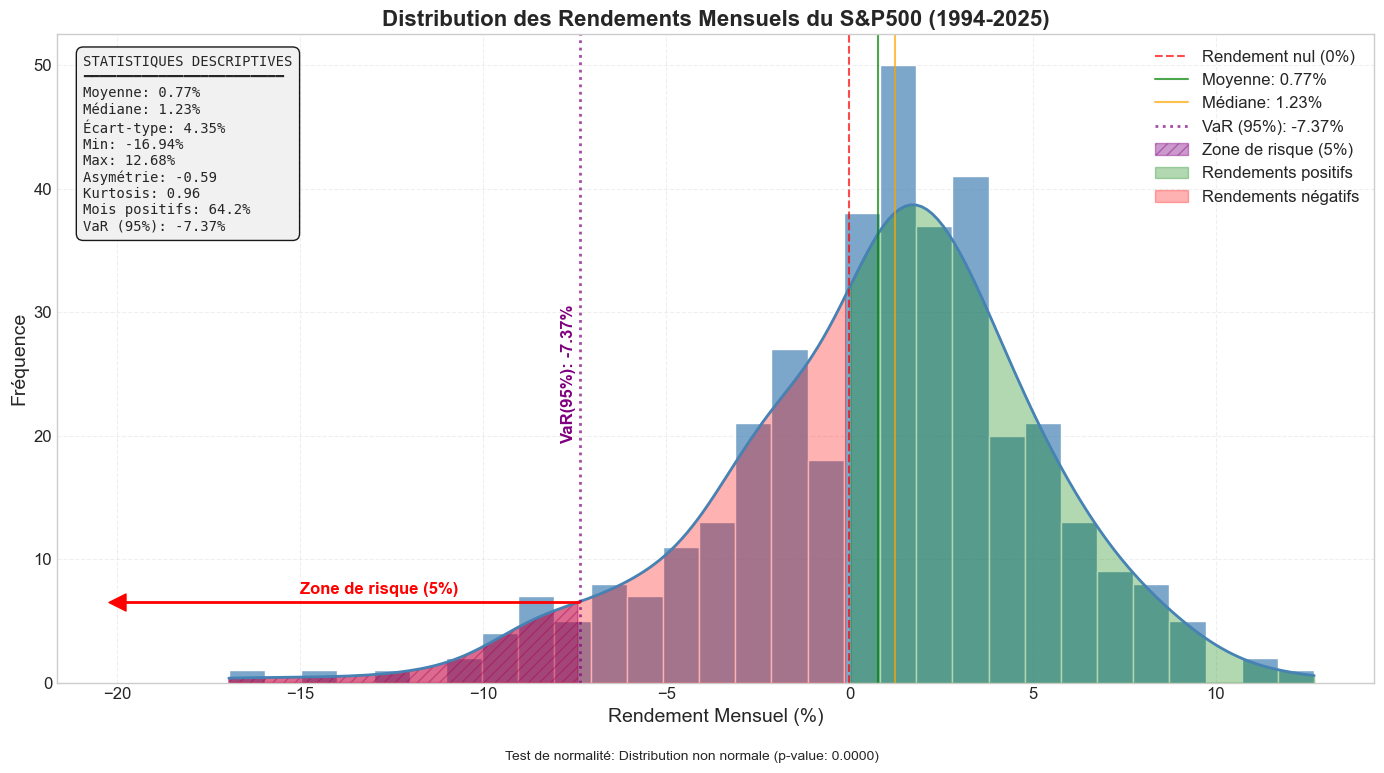

Distribution des rendements mensuels par quantiles:


,Quantile,Rendement
0,1%,-11.00%
1,5%,-7.37%
2,10%,-5.07%
3,25%,-1.78%
4,50%,1.23%
5,75%,3.57%
6,90%,5.77%
7,95%,7.38%
8,99%,9.48%


In [169]:
# 8. Distribution des rendements mensuels
plt.figure(figsize=(14, 8))

# Création de l'histogramme avec courbe KDE plus élégant
ax = sns.histplot(monthly_df['Monthly_Return_%'],
                 kde=True,
                 bins=30,
                 color='steelblue',
                 alpha=0.7,
                 line_kws={'linewidth': 2, 'color': 'darkblue'})

# Amélioration des marques sur l'axe X
min_value = np.floor(monthly_df['Monthly_Return_%'].min() / 10) * 10
max_value = np.ceil(monthly_df['Monthly_Return_%'].max() / 10) * 10
plt.xticks(np.arange(min_value, max_value + 5, 5))

# Ajout de lignes verticales pour des points de référence clés
plt.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Rendement nul (0%)')
plt.axvline(x=monthly_df['Monthly_Return_%'].mean(), color='green', linestyle='-',
           alpha=0.7, label=f'Moyenne: {monthly_df["Monthly_Return_%"].mean():.2f}%')
plt.axvline(x=monthly_df['Monthly_Return_%'].median(), color='orange', linestyle='-',
           alpha=0.7, label=f'Médiane: {monthly_df["Monthly_Return_%"].median():.2f}%')

# Ajout de la ligne et zone VaR (95%)
var_95 = np.percentile(monthly_df['Monthly_Return_%'], 5)  # Value at Risk (95%)
plt.axvline(x=var_95, color='purple', linestyle='dotted', linewidth=2,
           alpha=0.7, label=f'VaR (95%): {var_95:.2f}%')

# Ajout du libellé sous la ligne VaR(95%)
# Calculer une position y appropriée (25% de la hauteur maximale de la densité)
kde_y_max = np.max(ax.lines[0].get_data()[1])
y_position = kde_y_max * 0.5  # Position à 50% de la hauteur maximale

# Ajouter l'annotation avec rotation pour qu'elle soit lisible
plt.text(var_95 - 0.5, y_position, f'VaR(95%): {var_95:.2f}%',
         color='purple', fontweight='bold', rotation=90, va='bottom')

# Coloration de la zone VaR
pos_kde = ax.lines[0].get_data()
x_var = pos_kde[0][pos_kde[0] <= var_95]
y_var = pos_kde[1][pos_kde[0] <= var_95]
plt.fill_between(x_var, y_var, alpha=0.4, color='purple', hatch='///',
                label='Zone de risque (5%)')

# Ajout d'une ligne horizontale rouge pour indiquer la zone de risque
# Trouver l'index correspondant au var_95 dans les données KDE
var_index = np.argmin(np.abs(pos_kde[0] - var_95))
y_height = pos_kde[1][var_index]  # Hauteur au point de la VaR

# Tracer une ligne horizontale vers la gauche
plt.hlines(y=y_height, xmin=min_value, xmax=var_95, colors='red', linestyles='solid', linewidth=2)

# Ajouter une pointe de flèche à gauche
plt.scatter(min_value, y_height, marker='<', s=150, color='red')

# Ajouter le libellé sous la ligne horizontale
plt.text(min_value + 5, y_height + (0.1 * np.max(y_var)),
         "Zone de risque (5%)", color='red', fontweight='bold',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1))

# Coloration des zones de rendements
# Définition des points pour les zones négatives/positives
pos_kde = ax.lines[0].get_data()
x_positive = pos_kde[0][pos_kde[0] > 0]
y_positive = pos_kde[1][pos_kde[0] > 0]
x_negative = pos_kde[0][pos_kde[0] < 0]
y_negative = pos_kde[1][pos_kde[0] < 0]

# Remplissage des zones
plt.fill_between(x_positive, y_positive, alpha=0.3, color='green', label='Rendements positifs')
plt.fill_between(x_negative, y_negative, alpha=0.3, color='red', label='Rendements négatifs')

# Ajout des labels et du titre avec une meilleure mise en forme
plt.title(f'Distribution des Rendements Mensuels du S&P500 (1994-{datetime.today().year})',
         fontsize=16, fontweight='bold')
plt.xlabel('Rendement Mensuel (%)', fontsize=14)
plt.ylabel('Fréquence', fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')

# Calcul de statistiques supplémentaires
mean_return = monthly_df['Monthly_Return_%'].mean()
median_return = monthly_df['Monthly_Return_%'].median()
std_dev = monthly_df['Monthly_Return_%'].std()
min_return = monthly_df['Monthly_Return_%'].min()
max_return = monthly_df['Monthly_Return_%'].max()
skewness = monthly_df['Monthly_Return_%'].skew()
kurtosis = monthly_df['Monthly_Return_%'].kurtosis()
positive_months = (monthly_df['Monthly_Return_%'] > 0).mean() * 100
var_95 = np.percentile(monthly_df['Monthly_Return_%'], 5)  # Value at Risk (95%)

# Création d'un texte statistique plus complet
stats_text = (
    f"STATISTIQUES DESCRIPTIVES\n"
    f"━━━━━━━━━━━━━━━━━━━━━━━━\n"
    f"Moyenne: {mean_return:.2f}%\n"
    f"Médiane: {median_return:.2f}%\n"
    f"Écart-type: {std_dev:.2f}%\n"
    f"Min: {min_return:.2f}%\n"
    f"Max: {max_return:.2f}%\n"
    f"Asymétrie: {skewness:.2f}\n"
    f"Kurtosis: {kurtosis:.2f}\n"
    f"Mois positifs: {positive_months:.1f}%\n"
    f"VaR (95%): {var_95:.2f}%"
)

# Ajout d'une boîte de texte élégante
plt.annotate(stats_text, xy=(0.02, 0.97), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.5", fc="#f0f0f0", ec="black", alpha=0.9),
             va='top', fontsize=10, fontfamily='monospace')

# Ajout d'une légende
plt.legend(loc='upper right', framealpha=0.9)

# Test de normalité
from scipy import stats
stat, p_value = stats.normaltest(monthly_df['Monthly_Return_%'])
normality_result = "normale" if p_value > 0.05 else "non normale"
plt.figtext(0.5, 0.01, f"Test de normalité: Distribution {normality_result} (p-value: {p_value:.4f})",
           ha="center", fontsize=10, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Ajustement pour le texte du bas
plt.show()

# Tableau de statistiques par quantiles
quantiles = [0.01, 0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
quantile_values = [np.percentile(monthly_df['Monthly_Return_%'], q*100) for q in quantiles]

quantile_df = pd.DataFrame({
    'Quantile': [f"{q*100:.0f}%" for q in quantiles],
    'Rendement': [f"{val:.2f}%" for val in quantile_values]
})

print("Distribution des rendements mensuels par quantiles:")
display(quantile_df)

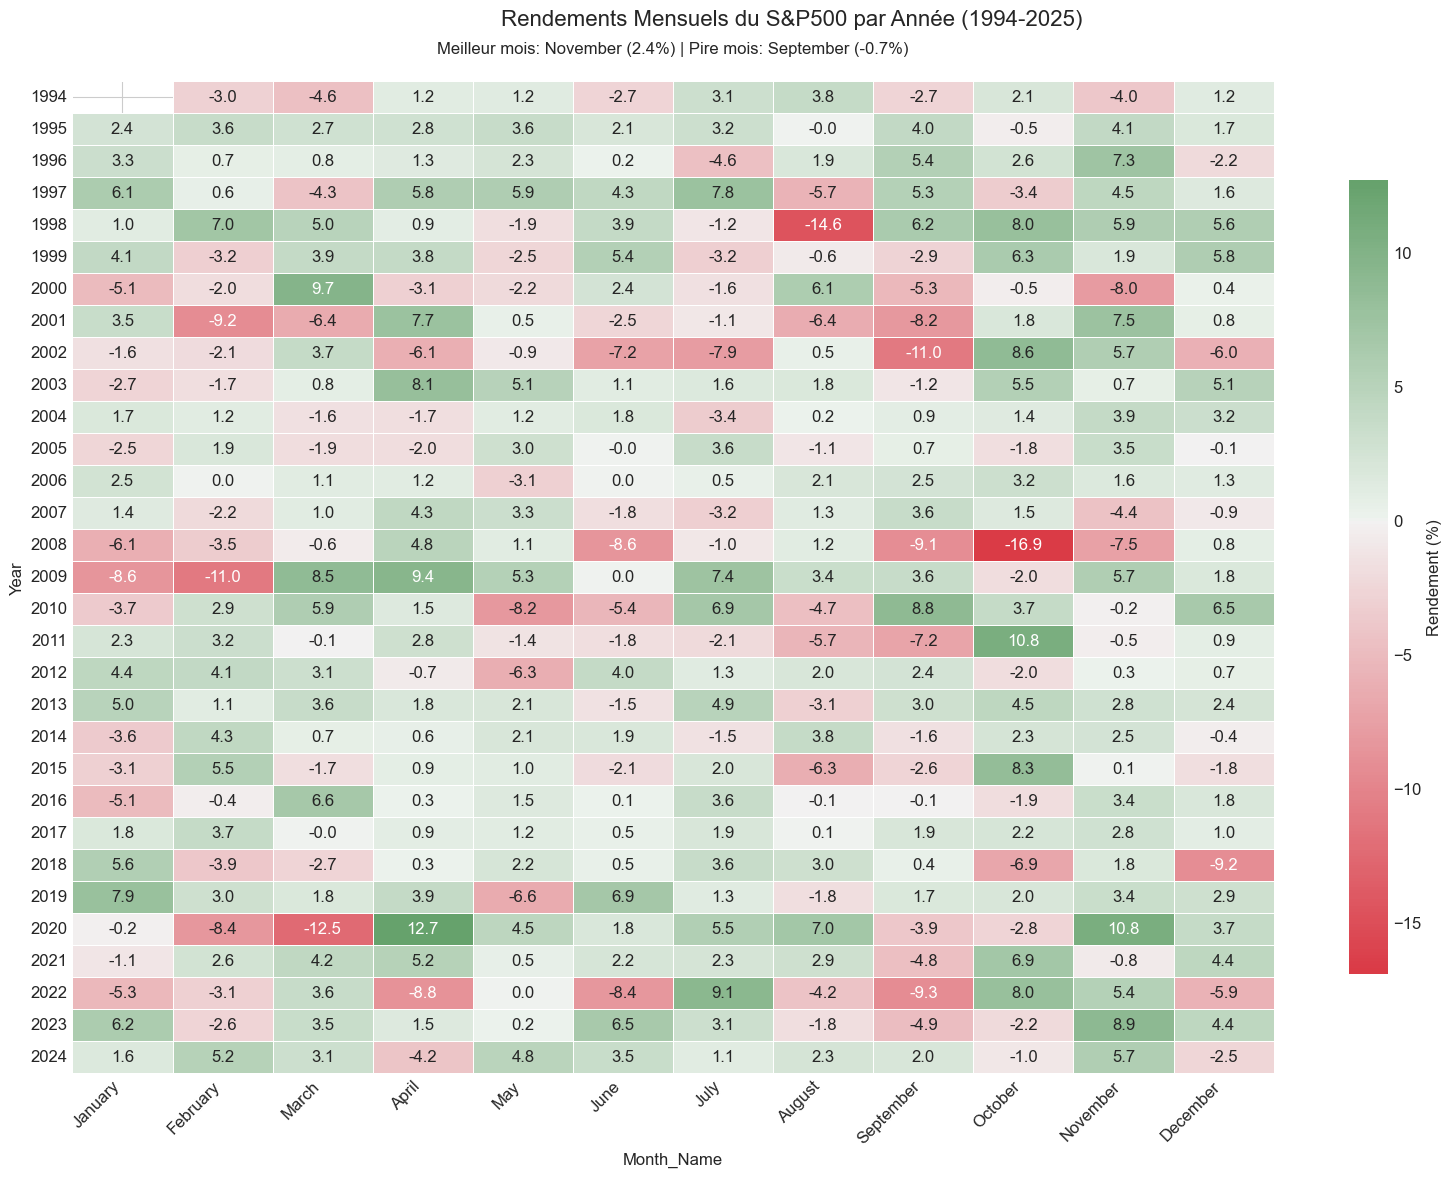

,Mois,Rendement moyen (%)
10,November,2.4
3,April,1.8
9,October,1.5
6,July,1.4
2,March,1.2
11,December,0.9
4,May,0.6
0,January,0.4
5,June,0.2
1,February,-0.2


In [147]:
# 9. Création d'une heatmap des rendements mensuels par année

# Configuration des noms de mois dans l'ordre chronologique
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Création du tableau croisé dynamique des rendements mensuels par année
monthly_pivot = monthly_df.pivot_table(
    index='Year',
    columns='Month_Name',
    values='Monthly_Return_%',
    aggfunc='sum'
)

# Réorganisation des colonnes dans l'ordre chronologique
monthly_pivot = monthly_pivot.reindex(columns=month_order)

# Création de la figure et sous-graphiques
fig, ax = plt.subplots(figsize=(16, 12))

# Calcul des moyennes par mois avant de créer la heatmap
monthly_means = monthly_pivot.mean().round(1)
best_month = monthly_means.idxmax()
best_month_return = monthly_means.max()
worst_month = monthly_means.idxmin()
worst_month_return = monthly_means.min()

# Création d'un titre composite avec toutes les informations
main_title = f'Rendements Mensuels du S&P500 par Année (1994-{datetime.today().year})'
stats_title = f'Meilleur mois: {best_month} ({best_month_return}%) | Pire mois: {worst_month} ({worst_month_return}%)'

# Définir un titre principal avec une taille plus grande et un espace suffisant
fig.suptitle(main_title, fontsize=16, y=0.98)
# Ajouter un deuxième titre pour les statistiques, bien séparé du graphique principal
plt.title(stats_title, fontsize=12, pad=20)

# Création de la palette de couleurs (rouge pour négatif, blanc pour neutre, vert pour positif)
cmap = sns.diverging_palette(10, 130, as_cmap=True)

# Création de la heatmap avec annotations
sns.heatmap(
    monthly_pivot,
    annot=True,
    fmt=".1f",
    cmap=cmap,
    center=0,
    linewidths=0.5,
    cbar_kws={'label': 'Rendement (%)', 'shrink': 0.8}
)

# Mise en forme du graphique
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustement pour garantir un bon espacement
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Réserver de l'espace en haut pour les titres

plt.tight_layout()
plt.show()

# Afficher aussi un tableau des moyennes mensuelles pour une analyse plus détaillée
mean_df = pd.DataFrame({
    'Mois': month_order,
    'Rendement moyen (%)': [monthly_means.get(month, float('nan')) for month in month_order]
}).dropna()

display(mean_df.sort_values('Rendement moyen (%)', ascending=False))

Statistiques de performance par mois (1994-2025):


,mean,median,min,max,std,count,positive_pct
Month_Name,,,,,,,
January,0.41%,1.50%,-8.57%,7.87%,4.24%,30,56.7%
February,-0.19%,0.59%,-10.99%,7.04%,4.34%,31,54.8%
March,1.19%,1.11%,-12.51%,9.67%,4.47%,31,64.5%
April,1.84%,1.34%,-8.80%,12.68%,4.40%,31,77.4%
May,0.64%,1.16%,-8.20%,5.86%,3.45%,31,71.0%
June,0.23%,0.48%,-8.60%,6.89%,3.91%,31,64.5%
July,1.39%,1.62%,-7.90%,9.11%,3.91%,31,64.5%
August,-0.42%,0.23%,-14.58%,7.01%,4.39%,31,54.8%
September,-0.72%,0.43%,-11.00%,8.76%,5.03%,31,51.6%


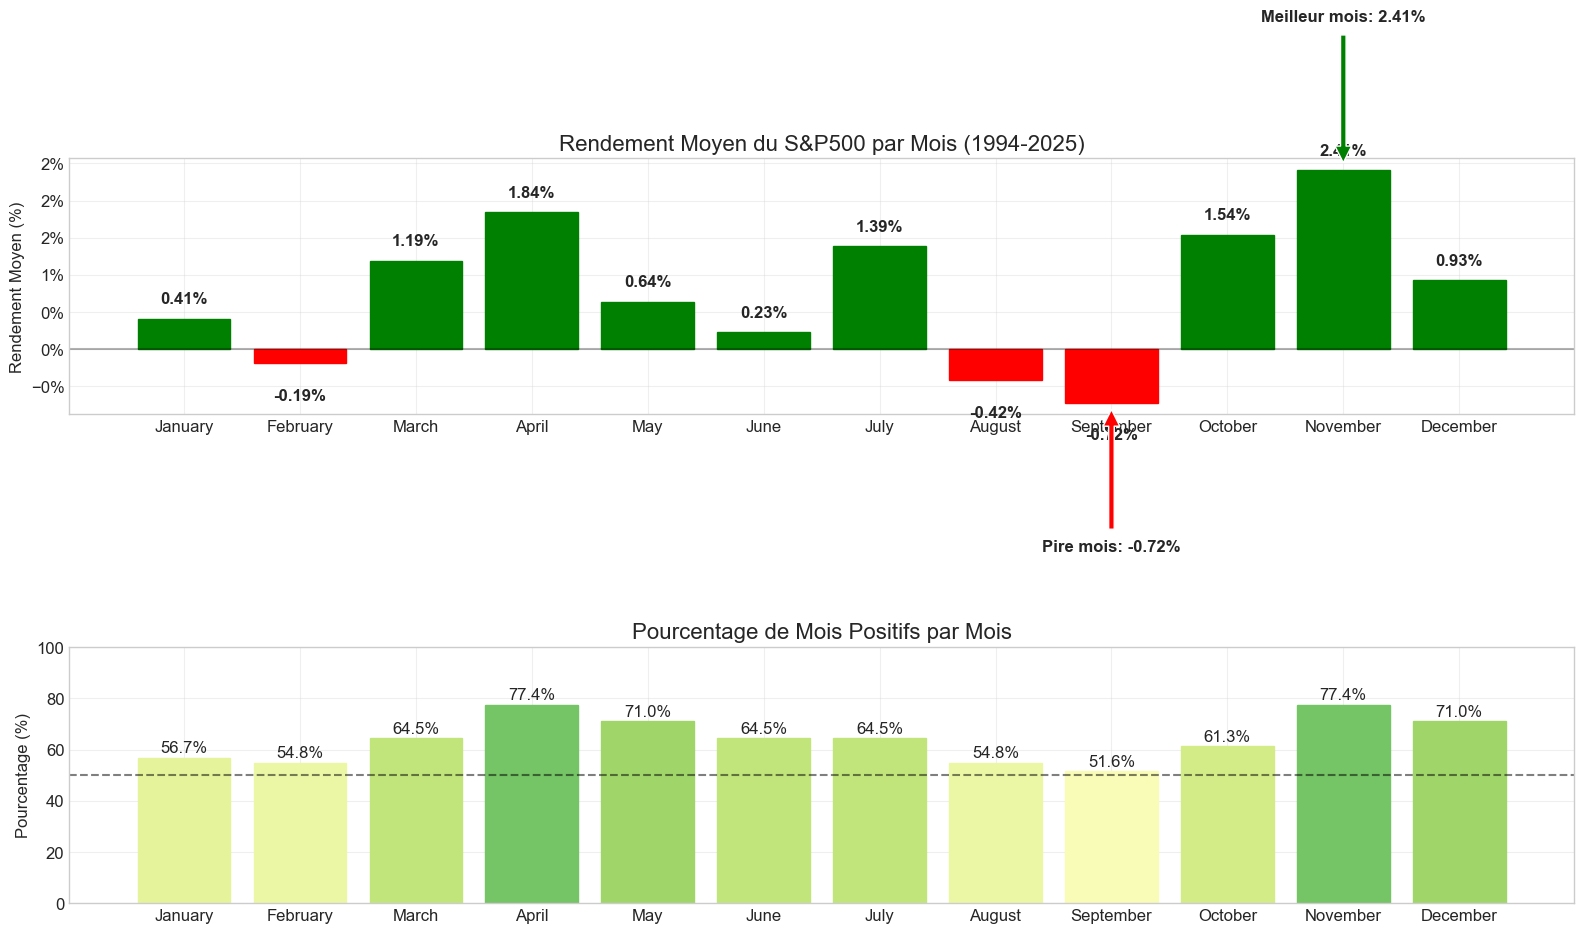


Mois classés par performance moyenne:


,mean,positive_pct,count
Month_Name,,,
November,2.41%,77.4%,31
April,1.84%,77.4%,31
October,1.54%,61.3%,31
July,1.39%,64.5%,31
March,1.19%,64.5%,31



Mois les moins performants:


,mean,positive_pct,count
Month_Name,,,
January,0.41%,56.7%,30
June,0.23%,64.5%,31
February,-0.19%,54.8%,31
August,-0.42%,54.8%,31
September,-0.72%,51.6%,31


In [146]:
# 10. Analyse des meilleurs et pires mois

# Définition de l'ordre standard des mois
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Regroupement par mois et calcul des statistiques
monthly_performance = monthly_df.groupby('Month_Name')['Monthly_Return_%'].agg([
    'mean', 'median', 'min', 'max', 'std', 'count'
]).round(2)

# Réorganisation des mois dans l'ordre chronologique
monthly_performance = monthly_performance.reindex(month_order)

# Ajout du % de mois positifs
monthly_performance['positive_pct'] = monthly_df.groupby('Month_Name')['Monthly_Return_%'].apply(
    lambda x: (x > 0).mean() * 100
).round(1)

# Identification des meilleurs et pires mois en moyenne
best_month = monthly_performance['mean'].idxmax()
worst_month = monthly_performance['mean'].idxmin()
best_month_return = monthly_performance.loc[best_month, 'mean']
worst_month_return = monthly_performance.loc[worst_month, 'mean']

# Affichage des performances mensuelles avec formatage amélioré
print(f"Statistiques de performance par mois (1994-{datetime.today().year}):")
display(monthly_performance.style.format({
    'mean': '{:.2f}%',
    'median': '{:.2f}%',
    'min': '{:.2f}%',
    'max': '{:.2f}%',
    'std': '{:.2f}%',
    'positive_pct': '{:.1f}%'
}).background_gradient(subset=['mean'], cmap='RdYlGn'))

# Visualisation des rendements moyens par mois avec données supplémentaires
plt.figure(figsize=(16, 10))

# Création des barres pour les rendements moyens mensuels
ax = plt.subplot(2, 1, 1)
bars = plt.bar(monthly_performance.index, monthly_performance['mean'])

# Coloration des barres (vert pour positif, rouge pour négatif)
for i, bar in enumerate(bars):
    bar.set_color('green' if monthly_performance['mean'].iloc[i] > 0 else 'red')

plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.title(f'Rendement Moyen du S&P500 par Mois (1994-{datetime.today().year})', fontsize=16)
plt.ylabel('Rendement Moyen (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Formatage de l'axe y en pourcentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Ajout des valeurs au-dessus/dessous des barres
for i, v in enumerate(monthly_performance['mean']):
    plt.text(i, v + (0.2 if v >= 0 else -0.5), f"{v:.2f}%", ha='center', fontweight='bold')

# Annotation pour les meilleurs et pires mois
plt.annotate(f'Meilleur mois: {best_month_return:.2f}%',
             xy=(monthly_performance.index.get_loc(best_month), best_month_return),
             xytext=(monthly_performance.index.get_loc(best_month), best_month_return + 2),
             arrowprops=dict(facecolor='green', shrink=0.05),
             fontweight='bold', ha='center')

plt.annotate(f'Pire mois: {worst_month_return:.2f}%',
             xy=(monthly_performance.index.get_loc(worst_month), worst_month_return),
             xytext=(monthly_performance.index.get_loc(worst_month), worst_month_return - 2),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontweight='bold', ha='center')

# Second graphique: pourcentage de mois positifs
plt.subplot(2, 1, 2)
bars = plt.bar(monthly_performance.index, monthly_performance['positive_pct'])

# Coloration des barres selon la fréquence
for i, bar in enumerate(bars):
    intensity = monthly_performance['positive_pct'].iloc[i] / 100
    bar.set_color(plt.cm.RdYlGn(intensity))

plt.axhline(y=50, color='black', linestyle='--', alpha=0.5, label='Seuil 50%')
plt.title('Pourcentage de Mois Positifs par Mois', fontsize=16)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0, 100)

# Ajout des valeurs sur les barres
for i, v in enumerate(monthly_performance['positive_pct']):
    plt.text(i, v + 2, f"{v:.1f}%", ha='center')

plt.tight_layout()
plt.show()

# Tableau récapitulatif des mois classés par performance
ranked_months = monthly_performance.sort_values('mean', ascending=False)
print("\nMois classés par performance moyenne:")
display(ranked_months[['mean', 'positive_pct', 'count']].head().style.format({
    'mean': '{:.2f}%',
    'positive_pct': '{:.1f}%'
}))

print("\nMois les moins performants:")
display(ranked_months[['mean', 'positive_pct', 'count']].tail().style.format({
    'mean': '{:.2f}%',
    'positive_pct': '{:.1f}%'
}))


Analyse des marchés haussiers et baissiers (1994-2024):

Marchés haussiers:
      Regime Start_Date   End_Date  Duration_Days  Start_Price  End_Price  \
1   Haussier 2024-12-06 2022-10-12           -786      6090.27    3577.03   
3   Haussier 2022-01-03 2020-03-23           -651      4796.56    2237.40   
5   Haussier 2020-02-19 2018-12-24           -422      3386.15    2351.10   
7   Haussier 2018-09-20 2011-10-03          -2544      2930.75    1099.23   
9   Haussier 2011-04-29 2009-03-09           -781      1363.61     676.53   
11  Haussier 2007-10-09 2002-10-09          -1826      1565.15     776.76   
13  Haussier 2000-03-24 1998-08-31           -571      1527.46     957.28   
15  Haussier 1998-07-17 1994-01-03          -1656      1186.75     465.44   

    Return_Pct  
1   -41.266479  
3   -53.354070  
5   -30.567163  
7   -62.493218  
9   -50.386841  
11  -50.371530  
13  -37.328637  
15  -60.780282  

Marchés baissiers:
      Regime Start_Date   End_Date  Duration_Days  Start

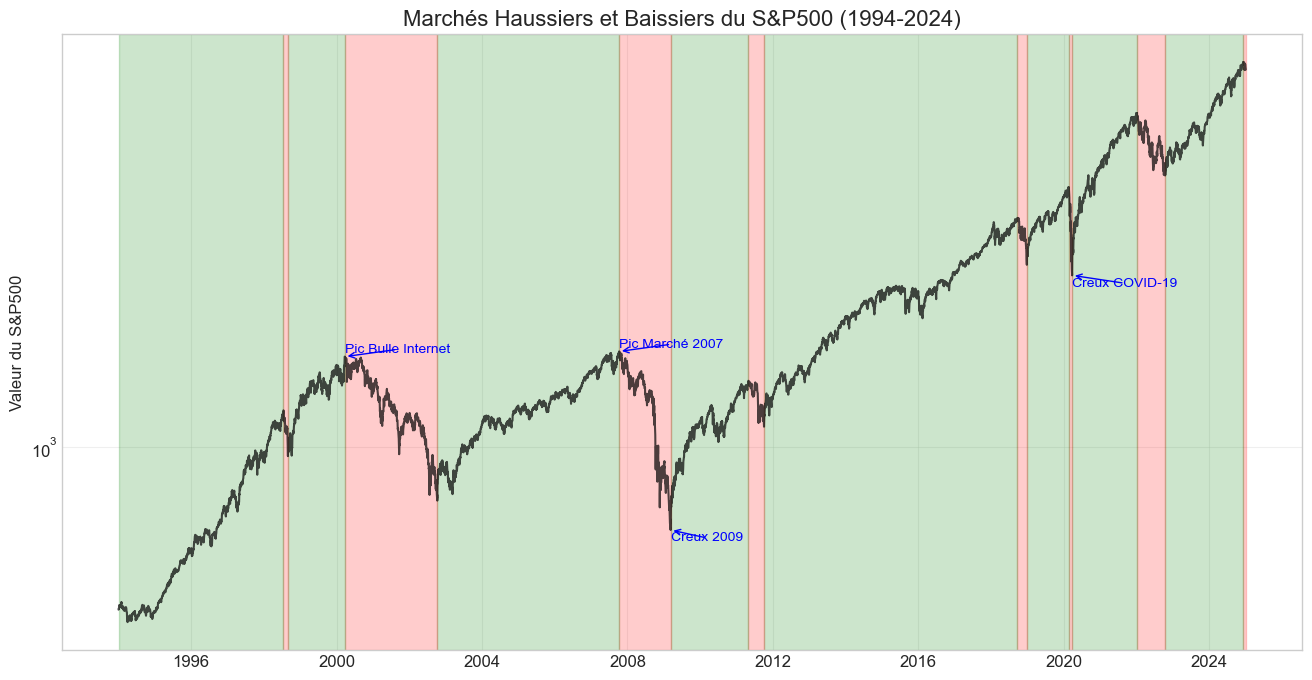

In [144]:
# 12. Identification et analyse des marchés haussiers et baissiers
def identify_bull_bear_markets_direct(prices, threshold=20):
    """
    Identifie directement les marchés haussiers et baissiers:
    - Un marché baissier est une baisse de threshold% ou plus depuis le sommet
    - Un marché haussier est une hausse de threshold% ou plus depuis le creux

    La méthode identifie d'abord tous les sommets et creux importants,
    puis catégorise les périodes entre eux.

    Paramètres:
    - prices: Série de prix (pandas Series)
    - threshold: Seuil en pourcentage (défaut: 20)

    Retourne:
    - DataFrame avec les périodes haussières et baissières
    """
    # Convertir le seuil en décimal
    threshold_decimal = threshold / 100

    # Trouver les sommets et creux significatifs
    peaks_and_troughs = []
    price_max = prices.iloc[0]
    price_min = prices.iloc[0]

    current_state = "searching"  # États possibles: "searching", "potential_bear", "potential_bull"

    for date, price in prices.items():
        if current_state == "searching":
            if price > price_max:
                price_max = price
                max_date = date
            elif price < price_min:
                price_min = price
                min_date = date

            # Vérifier si nous avons une baisse suffisante pour un marché baissier
            if price / price_max - 1 <= -threshold_decimal:
                peaks_and_troughs.append(("peak", max_date, price_max))
                # Réinitialiser et commencer à chercher le creux
                current_state = "potential_bear"
                price_min = price
                min_date = date

            # Vérifier si nous avons une hausse suffisante pour un marché haussier
            elif price / price_min - 1 >= threshold_decimal:
                peaks_and_troughs.append(("trough", min_date, price_min))
                # Réinitialiser et commencer à chercher le sommet
                current_state = "potential_bull"
                price_max = price
                max_date = date

        elif current_state == "potential_bear":
            # Chercher le creux pendant un marché baissier
            if price < price_min:
                price_min = price
                min_date = date

            # Vérifier si nous avons une hausse suffisante pour un marché haussier
            if price / price_min - 1 >= threshold_decimal:
                peaks_and_troughs.append(("trough", min_date, price_min))
                # Réinitialiser et commencer à chercher le sommet
                current_state = "potential_bull"
                price_max = price
                max_date = date

        elif current_state == "potential_bull":
            # Chercher le sommet pendant un marché haussier
            if price > price_max:
                price_max = price
                max_date = date

            # Vérifier si nous avons une baisse suffisante pour un marché baissier
            if price / price_max - 1 <= -threshold_decimal:
                peaks_and_troughs.append(("peak", max_date, price_max))
                # Réinitialiser et commencer à chercher le creux
                current_state = "potential_bear"
                price_min = price
                min_date = date

    # Si nous n'avons pas de points, retourner un DataFrame vide
    if len(peaks_and_troughs) == 0:
        return pd.DataFrame(columns=['Regime', 'Start_Date', 'End_Date', 'Duration_Days',
                                     'Start_Price', 'End_Price', 'Return_Pct'])

    # Créer les périodes à partir des sommets et creux
    regimes = []

    # Si nous commençons par un pic, la période avant était haussière
    # Si nous commençons par un creux, la période avant était baissière
    if peaks_and_troughs[0][0] == "peak":
        # La période du début jusqu'au premier pic était haussière
        regime_start_date = prices.index[0]
        regime_start_price = prices.iloc[0]
        regime_end_date = peaks_and_troughs[0][1]
        regime_end_price = peaks_and_troughs[0][2]

        regimes.append({
            'Regime': 'Baissier',  # Changez 'Haussier' en 'Baissier' pour être cohérent
            'Start_Date': regime_start_date,
            'End_Date': regime_end_date,
            'Duration_Days': (regime_end_date - regime_start_date).days,
            'Start_Price': regime_start_price,
            'End_Price': regime_end_price,
            'Return_Pct': (regime_end_price / regime_start_price - 1) * 100
        })

    # Construire le reste des régimes
    for i in range(len(peaks_and_troughs) - 1):
        point_type, start_date, start_price = peaks_and_troughs[i]
        next_type, end_date, end_price = peaks_and_troughs[i + 1]

        # Si le point actuel est un pic, le prochain régime est baissier
        # Si le point actuel est un creux, le prochain régime est haussier
        regime = 'Haussier' if point_type == 'peak' else 'Baissier'

        regimes.append({
            'Regime': regime,
            'Start_Date': start_date,
            'End_Date': end_date,
            'Duration_Days': (end_date - start_date).days,
            'Start_Price': start_price,
            'End_Price': end_price,
            'Return_Pct': (end_price / start_price - 1) * 100
        })

    # Ajouter la dernière période jusqu'à aujourd'hui
    last_point_type, last_date, last_price = peaks_and_troughs[-1]
    last_regime = 'Baissier' if last_point_type == 'trough' else 'Haussier'

    regimes.append({
        'Regime': last_regime,
        'Start_Date': last_date,
        'End_Date': prices.index[-1],
        'Duration_Days': (prices.index[-1] - last_date).days,
        'Start_Price': last_price,
        'End_Price': prices.iloc[-1],
        'Return_Pct': (prices.iloc[-1] / last_price - 1) * 100
    })

    return pd.DataFrame(regimes)

try:
    # Utiliser l'algorithme direct pour identifier les marchés haussiers et baissiers
    market_regimes = identify_bull_bear_markets_direct(sp500_data[price_column])

    # Séparation des marchés haussiers et baissiers
    bull_markets = market_regimes[market_regimes['Regime'] == 'Haussier']
    bear_markets = market_regimes[market_regimes['Regime'] == 'Baissier']

    # Calcul des statistiques pour les marchés haussiers et baissiers
    bull_stats = {
        'Count': len(bull_markets),
        'Avg_Duration_Days': bull_markets['Duration_Days'].mean() if len(bull_markets) > 0 else 0,
        'Avg_Return_Pct': bull_markets['Return_Pct'].mean() if len(bull_markets) > 0 else 0,
        'Max_Return_Pct': bull_markets['Return_Pct'].max() if len(bull_markets) > 0 else 0,
        'Min_Return_Pct': bull_markets['Return_Pct'].min() if len(bull_markets) > 0 else 0
    }

    bear_stats = {
        'Count': len(bear_markets),
        'Avg_Duration_Days': bear_markets['Duration_Days'].mean() if len(bear_markets) > 0 else 0,
        'Avg_Return_Pct': bear_markets['Return_Pct'].mean() if len(bear_markets) > 0 else 0,
        'Max_Return_Pct': bear_markets['Return_Pct'].max() if len(bear_markets) > 0 else 0,
        'Min_Return_Pct': bear_markets['Return_Pct'].min() if len(bear_markets) > 0 else 0
    }

    # Affichage des résultats
    print("\nAnalyse des marchés haussiers et baissiers (1994-2024):")
    print("\nMarchés haussiers:")
    print(bull_markets)
    print("\nMarchés baissiers:")
    print(bear_markets)

    print("\nStatistiques des marchés haussiers:")
    for stat, value in bull_stats.items():
        print(f"{stat}: {value:.2f}" if isinstance(value, float) else f"{stat}: {value}")

    print("\nStatistiques des marchés baissiers:")
    for stat, value in bear_stats.items():
        print(f"{stat}: {value:.2f}" if isinstance(value, float) else f"{stat}: {value}")

    # Visualisation des marchés haussiers et baissiers
    plt.figure(figsize=(16, 8))
    plt.plot(sp500_data.index, sp500_data[price_column], color='black', alpha=0.7)

    # Mise en évidence des marchés haussiers et baissiers
    for _, regime in market_regimes.iterrows():
        start = regime['Start_Date']
        end = regime['End_Date']
        color = 'green' if regime['Regime'] == 'Haussier' else 'red'
        plt.axvspan(start, end, alpha=0.2, color=color)

    plt.title('Marchés Haussiers et Baissiers du S&P500 (1994-2024)', fontsize=16)
    plt.ylabel('Valeur du S&P500', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.yscale('log')  # Échelle logarithmique pour mieux visualiser les variations en pourcentage

    # Ajout d'annotations pour les événements majeurs si les données couvrent ces périodes
    events = [
        {'date': '2000-03-24', 'name': 'Pic Bulle Internet', 'y_offset': 0.02},
        {'date': '2007-10-09', 'name': 'Pic Marché 2007', 'y_offset': 0.02},
        {'date': '2009-03-09', 'name': 'Creux 2009', 'y_offset': -0.05},
        {'date': '2020-03-23', 'name': 'Creux COVID-19', 'y_offset': -0.05}
    ]

    for event in events:
        event_date = pd.Timestamp(event['date'])
        if event_date >= sp500_data.index.min() and event_date <= sp500_data.index.max():
            try:
                # Trouver la date la plus proche dans l'index
                closest_date = sp500_data.index[sp500_data.index.get_indexer([event_date], method='nearest')[0]]
                price = sp500_data.loc[closest_date, price_column]
                plt.annotate(event['name'], xy=(event_date, price),
                            xytext=(event_date, price * (1 + event['y_offset'])),
                            arrowprops=dict(arrowstyle='->', color='blue'),
                            fontsize=10, color='blue')
            except Exception as e:
                print(f"Impossible d'ajouter l'annotation pour {event['name']}: {str(e)}")

    plt.show()
except Exception as e:
    print(f"Erreur lors de l'analyse des marchés haussiers et baissiers: {str(e)}")